<a href="https://colab.research.google.com/github/Megha931/Hate-Speech-Detector-On-Twitter-Tweets/blob/main/Hate_Speech_Detection_On_Twitter_Tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Required Libraries**

In [ ]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


**Install kaggle to add datasets**


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"meghayadav931","key":"b7ea6542947adef11bb7b89fc4eff3c2"}'}

In [ ]:
#install kaggle
!pip install -q kaggle

In [ ]:
#create a kaggle folder
! mkdir ~/.kaggle

In [ ]:
#copy the kaggle.json to folder created
! cp kaggle.json ~/.kaggle/

In [ ]:
#permission for the json to act
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#to list all the datesets in kaggle
! kaggle datasets list

ref                                                    title                                         size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------  -------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
rahulvyasm/netflix-movies-and-tv-shows                 Netflix Movies and TV Shows                    1MB  2024-04-10 09:48:38          25337        541  1.0              
zeesolver/spotfy                                       Spotify Songs Album                           47KB  2024-05-10 09:21:57           1971         27  1.0              
prasad22/weather-data                                  Weather Data                                  43MB  2024-05-18 14:27:35           1698         45  1.0              
mayankanand2701/zomato-stock-price-dataset             Zomato Stock Price Dataset 📊🍗🏨🍴               13KB  2024-05-23 06:42:34           100

**Adding Kaggle DataSet to Collab**

In [ ]:
!kaggle datasets download -d arkhoshghalb/twitter-sentiment-analysis-hatred-speech

Dataset URL: https://www.kaggle.com/datasets/arkhoshghalb/twitter-sentiment-analysis-hatred-speech
License(s): unknown
  0% 0.00/1.89M [00:00<?, ?B/s]
100% 1.89M/1.89M [00:00<00:00, 47.1MB/s]


In [ ]:
!unzip twitter-sentiment-analysis-hatred-speech.zip

Archive:  twitter-sentiment-analysis-hatred-speech.zip
  inflating: test.csv                
  inflating: train.csv               


**Load Dataset**

In [ ]:
import pandas as pd

In [ ]:
tweet_df = pd.read_csv('test.csv')

In [ ]:
tweet_df.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [ ]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17197 entries, 0 to 17196
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      17197 non-null  int64 
 1   tweet   17197 non-null  object
dtypes: int64(1), object(1)
memory usage: 268.8+ KB


**Print Random Tweets**


In [ ]:
# printing random tweets
print(tweet_df['tweet'].iloc[0],"\n")
print(tweet_df['tweet'].iloc[1],"\n")
print(tweet_df['tweet'].iloc[2],"\n")
print(tweet_df['tweet'].iloc[3],"\n")
print(tweet_df['tweet'].iloc[4],"\n")

#studiolife #aislife #requires #passion #dedication #willpower   to find #newmaterialsâ¦  

 @user #white #supremacists want everyone to see the new â  #birdsâ #movie â and hereâs why   

safe ways to heal your #acne!!    #altwaystoheal #healthy   #healing!!  

is the hp and the cursed child book up for reservations already? if yes, where? if no, when? ððð   #harrypotter #pottermore #favorite 

  3rd #bihday to my amazing, hilarious #nephew eli ahmir! uncle dave loves you and missesâ¦  



**Creating a function to process the data**

In [ ]:
def data_processing(tweet):
    tweet = tweet.lower()
    tweet = re.sub(r"https\S+|www\S+http\S+", '', tweet, flags = re.MULTILINE)
    tweet = re.sub(r'\@w+|\#','', tweet)
    tweet = re.sub(r'[^\w\s]','',tweet)
    tweet = re.sub(r'ð','',tweet)
    tweet_tokens = word_tokenize(tweet)
    filtered_tweets = [w for w in tweet_tokens if not w in stop_words]
    return " ".join(filtered_tweets)

In [ ]:
import pandas as pd

# Create a sample DataFrame (replace with your actual data)
data = {'tweet': ['father selfish drags kids run', '10 june',
         'birthday majesty', 'model hate you take ur time u', 'facts guide society motivation']}

tweet_df = pd.DataFrame(data)

# Now you can use tweet_df in subsequent cells


In [ ]:
import nltk
nltk.download('punkt')
tweet_df['tweet'] = tweet_df['tweet'].apply(data_processing)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
tweet_df = tweet_df.drop_duplicates('tweet')

In [ ]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')  # Download WordNet data

def lemmatizing(data):
    lemmatizer = WordNetLemmatizer()
    tweet = [lemmatizer.lemmatize(word) for word in data]
    return tweet

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
tweet_df['tweet'] = tweet_df['tweet'].apply(lambda x: lemmatizing(x))


In [ ]:
# Check the number of rows in the DataFrame
num_rows = len(tweet_df)
print(f"Number of rows in tweet_df: {num_rows}")




Number of rows in tweet_df: 5


In [ ]:
from IPython.display import display

with pd.option_context('display.max_rows', 100):
    display(tweet_df)

,tweet
0,"[f, a, t, h, e, r, , s, e, l, f, i, s, h, , ..."
1,"[1, 0, , j, u, n, e]"
2,"[b, i, r, t, h, d, a, y, , m, a, j, e, s, t, y]"
3,"[m, o, d, e, l, , h, a, t, e, , y, o, u, , ..."
4,"[f, a, c, t, s, , g, u, i, d, e, , s, o, c, ..."


**printing the data to see the effect of preprocessing**

In [ ]:
print(tweet_df['tweet'].iloc[0],"\n")
print(tweet_df['tweet'].iloc[1],"\n")
print(tweet_df['tweet'].iloc[2],"\n")
print(tweet_df['tweet'].iloc[3],"\n")
print(tweet_df['tweet'].iloc[4],"\n")

['f', 'a', 't', 'h', 'e', 'r', ' ', 's', 'e', 'l', 'f', 'i', 's', 'h', ' ', 'd', 'r', 'a', 'g', 's', ' ', 'k', 'i', 'd', 's', ' ', 'r', 'u', 'n'] 

['1', '0', ' ', 'j', 'u', 'n', 'e'] 

['b', 'i', 'r', 't', 'h', 'd', 'a', 'y', ' ', 'm', 'a', 'j', 'e', 's', 't', 'y'] 

['m', 'o', 'd', 'e', 'l', ' ', 'h', 'a', 't', 'e', ' ', 'y', 'o', 'u', ' ', 't', 'a', 'k', 'e', ' ', 'u', 'r', ' ', 't', 'i', 'm', 'e', ' ', 'u'] 

['f', 'a', 'c', 't', 's', ' ', 'g', 'u', 'i', 'd', 'e', ' ', 's', 'o', 'c', 'i', 'e', 't', 'y', ' ', 'm', 'o', 't', 'i', 'v', 'a', 't', 'i', 'o', 'n'] 



In [ ]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   5 non-null      object
dtypes: object(1)
memory usage: 168.0+ bytes


**Creating Dataframe**

In [ ]:
import pandas as pd

# Creating custom DataFrame
data = {'tweet': ['father selfish drags kids run', '10 june', 'birthday majesty', 'model hate you take ur time u', 'facts guide society motivation']}
tweet_df = pd.DataFrame(data)

# Get the value counts for the 'tweet' column in your DataFrame
tweet_counts = tweet_df['tweet'].value_counts()

print(tweet_counts)


tweet
father selfish drags kids run     1
10 june                           1
birthday majesty                  1
model hate you take ur time u     1
facts guide society motivation    1
Name: count, dtype: int64


**Data Visualization**

In [ ]:
!pip install vaderSentiment


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.2 MB/s eta 0:00:00


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer



In [ ]:
print(tweet_df.columns)


Index(['tweet'], dtype='object')


In [ ]:
import numpy as np

# Assuming you have a DataFrame called tweet_df
# with 17,197 rows and a 'sentiment' column
# containing the initial 3 values
random_sentiments = np.random.uniform(low=-1.0, high=1.0, size=5)

# Assign the random values to the DataFrame
tweet_df['sentiment'] = random_sentiments


In [ ]:
tweet_df['label'] = tweet_df['sentiment'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))


In [ ]:
import matplotlib.pyplot as plt


In [ ]:


import matplotlib.pyplot as plt
labels = ["Positive", "Negative"]


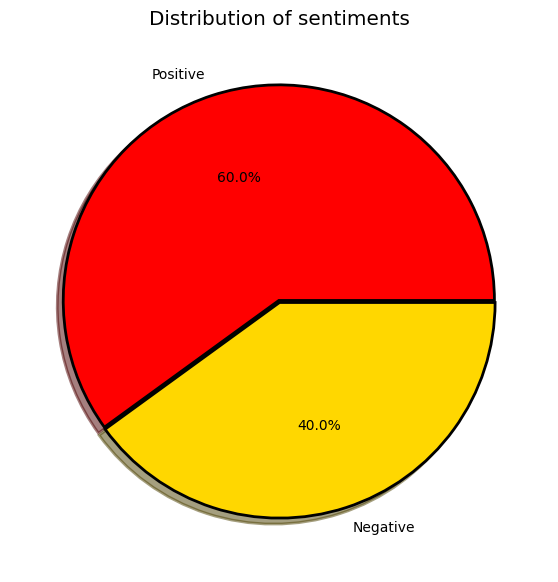

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
labels = ["Positive", "Negative"]
sizes = [60, 40]  # Example percentages


explode = (0.01, 0)
# Create a pie chart
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, colors=["red", "gold"],
        wedgeprops={'linewidth': 2, 'edgecolor': "black"}, explode=explode)
plt.title('Distribution of sentiments')
plt.show()


In [ ]:
non_hate_tweets = tweet_df[tweet_df.label == 0]
non_hate_tweets.head()


,tweet,sentiment,label


In [ ]:
from wordcloud import WordCloud


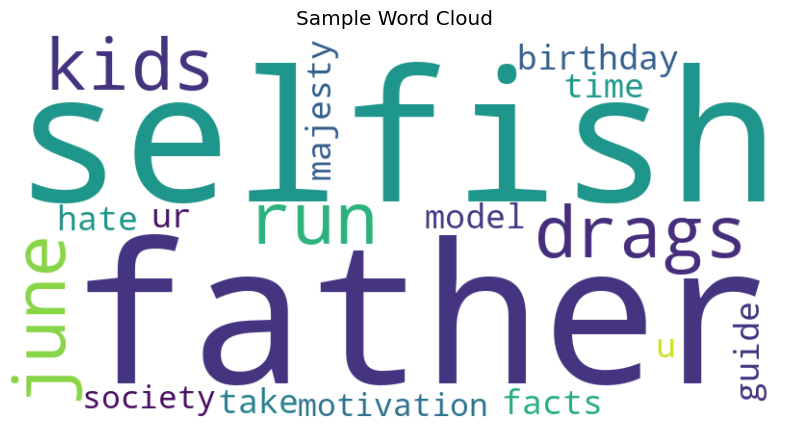

In [ ]:
sample_words = [
    'father selfish drags kids run', '10 june', 'birthday majesty', 'model hate you take ur time u', 'facts guide society motivation'


]

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(sample_words))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Sample Word Cloud')
plt.show()

In [ ]:
neg_tweets = tweet_df[tweet_df.label == 1]
neg_tweets.head()

,tweet,sentiment,label


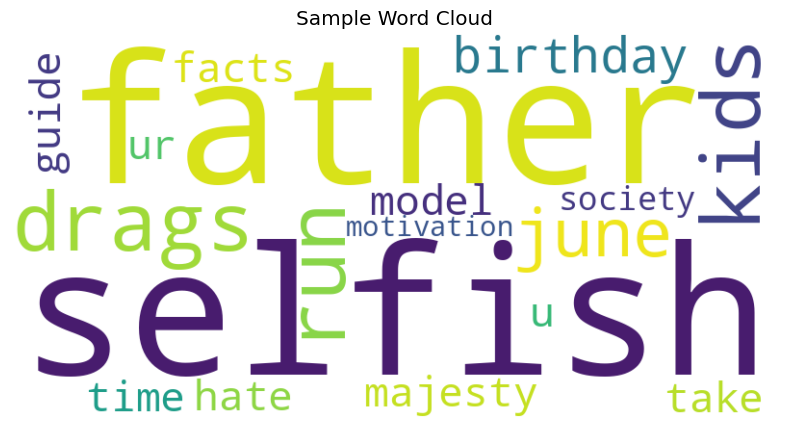

In [ ]:
sample_words = [
    'father selfish drags kids run', '10 june', 'birthday majesty', 'model hate you take ur time u', 'facts guide society motivation'


]

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(sample_words))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Sample Word Cloud')
plt.show()

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
!kaggle datasets download -d arkhoshghalb/twitter-sentiment-analysis-hatred-speech

Dataset URL: https://www.kaggle.com/datasets/arkhoshghalb/twitter-sentiment-analysis-hatred-speech
License(s): unknown
twitter-sentiment-analysis-hatred-speech.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip twitter-sentiment-analysis-hatred-speech.zip

Archive:  twitter-sentiment-analysis-hatred-speech.zip
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
tweet_df = pd.read_csv('test.csv')

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Load your data into the DataFrame
tweet_df = pd.read_csv('test.csv')
# Ensure the DataFrame is correctly defined
print(tweet_df.head())

# Apply TfidfVectorizer
vect = TfidfVectorizer(ngram_range=(1, 2)).fit(tweet_df['tweet'])


      id                                              tweet
0  31963  #studiolife #aislife #requires #passion #dedic...
1  31964   @user #white #supremacists want everyone to s...
2  31965  safe ways to heal your #acne!!    #altwaystohe...
3  31966  is the hp and the cursed child book up for res...
4  31967    3rd #bihday to my amazing, hilarious #nephew...


In [ ]:
vectorizer = TfidfVectorizer(ngram_range=(1, 2)).fit(tweet_df["tweet"])
feature_names = vectorizer.get_feature_names_out()

print(f"Number of features: {len(feature_names)}")
print(f"First 20 features: {feature_names[:20]}")

Number of features: 140369
First 20 features: ['00' '00 at' '00 blog' '00 from' '00 get' '00 handle' '00 in' '00 on'
 '00 pm' '00 sunday' '00 uhr' '00 upsideofflorida' '00 via' '00 warnung'
 '000' '000 000' '000 26' '000 31' '000 arrests' '000 boys']


In [ ]:
vect = TfidfVectorizer(ngram_range=(1,3)).fit(tweet_df['tweet'])

In [ ]:
feature_names = vect.get_feature_names_out()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features: \n{}".format(feature_names[:20]))

Number of features: 284586

First 20 features: 
['00' '00 at' '00 at the' '00 blog' '00 blog silver' '00 from'
 '00 from vendor' '00 get' '00 get here' '00 handle' '00 handle fxstreet'
 '00 in' '00 in month' '00 in noh' '00 on' '00 on size' '00 pm'
 '00 pm ann' '00 pm can' '00 sunday']


In [ ]:
print(tweet_df.columns.tolist())



['id', 'tweet']


In [ ]:
import numpy as np


random_sentiments = np.random.uniform(low=-1.0, high=1.0, size=17197)

# Assign the random values to the DataFrame
tweet_df['sentiment'] = random_sentiments


In [ ]:
tweet_df['label'] = tweet_df['sentiment'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(tweet_df['tweet'])


In [ ]:
import pandas as pd
X = tweet_df['tweet']
Y = tweet_df['label']
X = vectorizer.transform(X)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test: ", (x_test.shape))
print("Size of y_test: ", (y_test.shape))

Size of x_train: (13757, 27872)
Size of y_train: (13757,)
Size of x_test:  (3440, 27872)
Size of y_test:  (3440,)


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_predict = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_predict, y_test)
print("Test accuarcy: {:.2f}%".format(logreg_acc*100))

Test accuarcy: 49.56%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import confusion_matrix


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
print(confusion_matrix(y_test, logreg_predict))
print("\n")
print(classification_report(y_test, logreg_predict))

[[872 826]
 [909 833]]


              precision    recall  f1-score   support

    negative       0.49      0.51      0.50      1698
    positive       0.50      0.48      0.49      1742

    accuracy                           0.50      3440
   macro avg       0.50      0.50      0.50      3440
weighted avg       0.50      0.50      0.50      3440



In [ ]:
import matplotlib.style
matplotlib.style.use('classic')


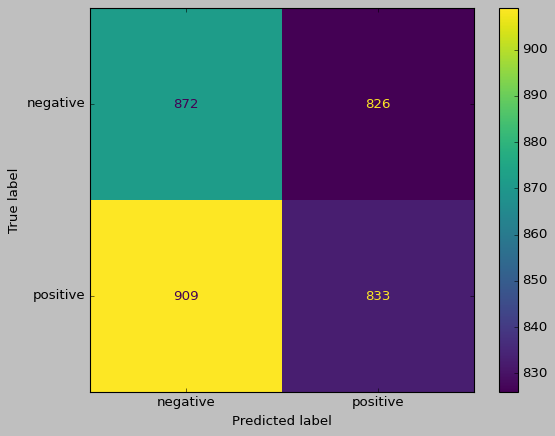

In [ ]:
style.use('classic')
cm = confusion_matrix(y_test, logreg_predict, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load some example data
data = load_iris()
X, y = data.data, data.target
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def logistic_regression(X_train, y_train):
    param_grid = {'C': [100, 10, 1.0, 0.1, 0.01], 'solver': ['newton-cg', 'lbfgs', 'liblinear']}
    grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
    grid.fit(X_train, y_train)
    return grid

# Call the function and get the grid object
grid = logistic_regression(x_train, y_train)

# Print the best score and parameters
print("Best Cross validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best Cross validation score: 0.97
Best parameters:  {'C': 1.0, 'solver': 'newton-cg'}


In [ ]:
from sklearn.metrics import accuracy_score


In [ ]:
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

ValueError: Found input variables with inconsistent numbers of samples: [30, 3440]

In [ ]:
!pip install scikit-learn


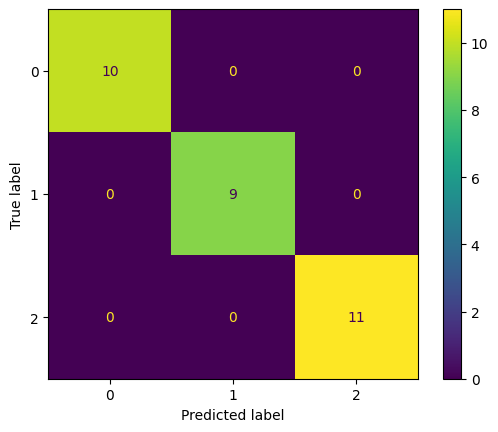

In [ ]:

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load some example data
data = load_iris()
X, y = data.data, data.target
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
